# MUSHROOM DATASET

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms in 1981. Each species can be identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.
So there 2 classes. Poisonous and edible.

This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and create a machine learning algorithm which detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [77]:
df=pd.read_csv("mushroom.csv")


# EXAMINE THE DATA

 import the data and now I will use .head and .info methods to learn more about dataset.

In [78]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


As we can see in this dataset there are 8124 rows and 23 columns

In [79]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [80]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [81]:
df.shape

(8124, 23)

 As we can see there are 8124 rows and 23 columns(attributes).

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Dataset Information 8124 rows x 23 columns with no null values.

All 22 features and 1 column for specifying class.

We can see that the all data is in object (string) format. All the data is non-numeric.

In [83]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Attribute Information: 

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# CHECKING MISSING VALUES

In [84]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

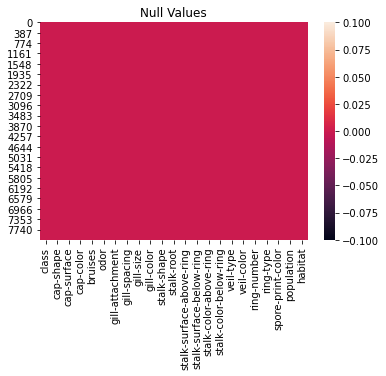

In [85]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

As we can see in our heatmap there is no missing value in this dataset.

# DESCRIBING DATASET

In [86]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


As we can see there is only one unique value under "veil-type", this means it is not contributing anything to our dataset. we can drop this particular.

In [87]:
df =df.drop("veil-type", axis = 1)
df.shape

(8124, 22)

In [88]:
df.shape

(8124, 22)

Our columns reduced from 23 to 22.

# Exploratory Data Analysis (EDA)

Scatterplot

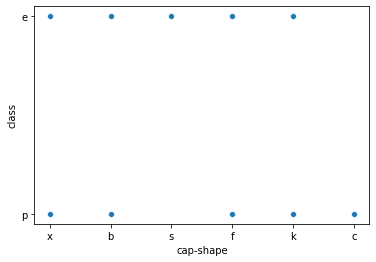

In [89]:
sns.scatterplot(x="cap-shape",y="class",data=df)

we get to know that sunke(s) shape mushrooms are all edible(e) and convex(c) surface mushrooms are all poisonous(p).

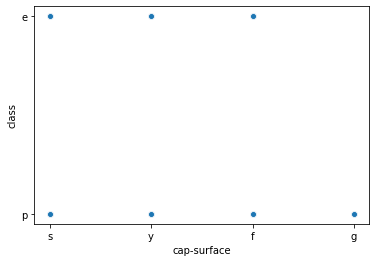

In [90]:
sns.scatterplot(x="cap-surface",y="class",data=df)

grooves(g) shape mushrooms are all poisonous(p).

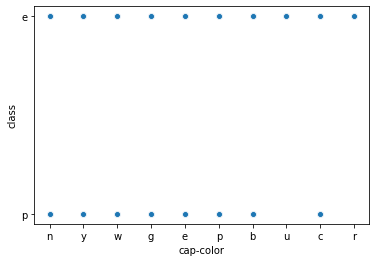

In [91]:
sns.scatterplot(x="cap-color",y="class",data=df)

green(r) color mushrooms are all edible mushrooms.

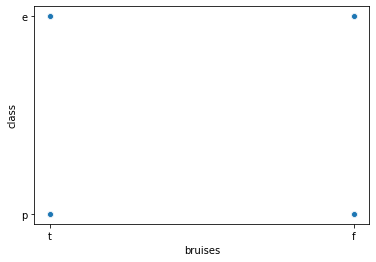

In [92]:
sns.scatterplot(x="bruises",y="class",data=df)

bruises(t),no(f) both are mixed edible and poisonous.

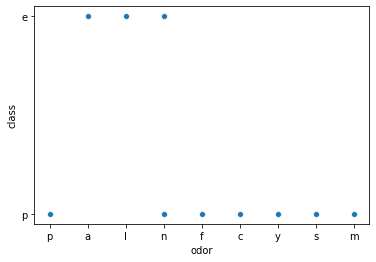

In [93]:
sns.scatterplot(x="odor",y="class",data=df)

Mushroom having anise(l) & almond(a) odor are all edible.

Mushroom having punget(p), creosote=c, fishy=y, foul=f, musty=m, spicy=s are all poisonous i.e. non-edible.

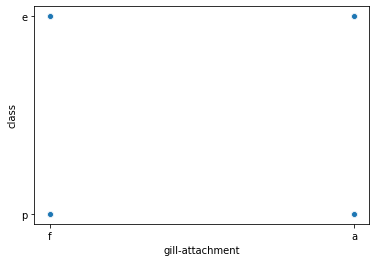

In [94]:
sns.scatterplot(x="gill-attachment",y="class",data=df)

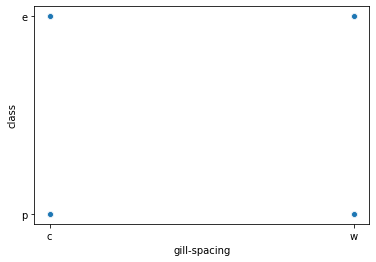

In [95]:
sns.scatterplot(x="gill-spacing",y="class",data=df)

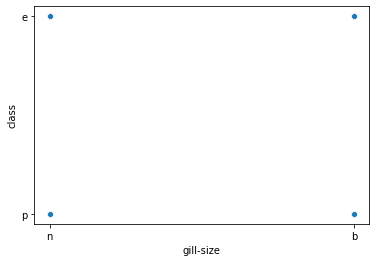

In [96]:
sns.scatterplot(x="gill-size",y="class",data=df)

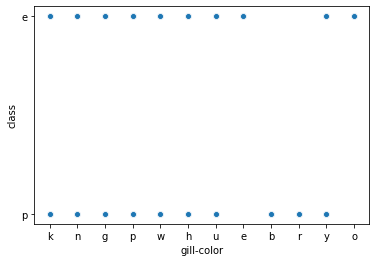

In [97]:
sns.scatterplot(x="gill-color",y="class",data=df)

Mushrooms having gill-color as red(e) & orange(o) are all edible.

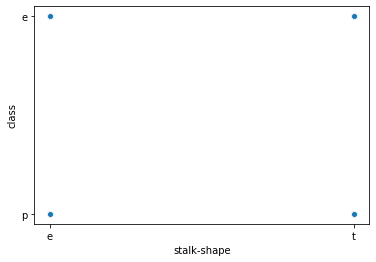

In [98]:
sns.scatterplot(x="stalk-shape",y="class",data=df)

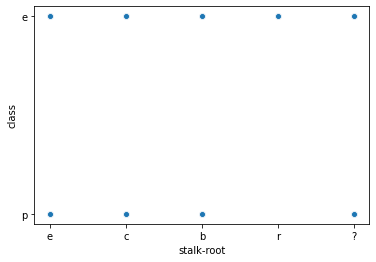

In [99]:
sns.scatterplot(x="stalk-root",y="class",data=df)

rooted(r) are all edible mushrooms.

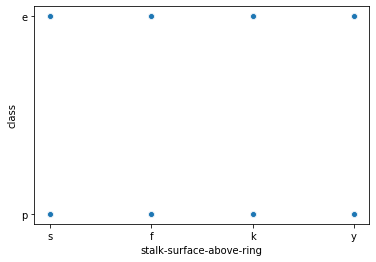

In [100]:
sns.scatterplot(x="stalk-surface-above-ring",y="class",data=df)

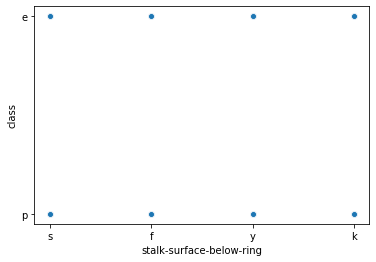

In [101]:
sns.scatterplot(x="stalk-surface-below-ring",y="class",data=df)

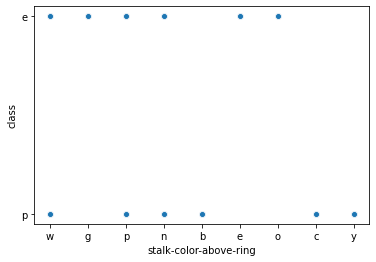

In [102]:
sns.scatterplot(x="stalk-color-above-ring",y="class",data=df)

grey(g),red(e), orange(o) are all edible mushrooms.

buff(b), cinnamon(c), yellow(y) all are poisonous.

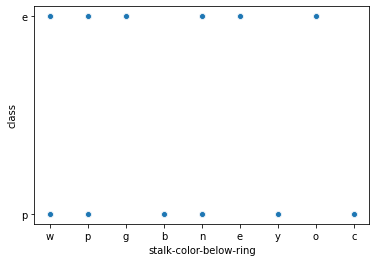

In [103]:
sns.scatterplot(x="stalk-color-below-ring",y="class",data=df)

grey(g),red(e), orange(o), are all edible mushrooms.

buff(b), cinnamon(c), are all poisonous.

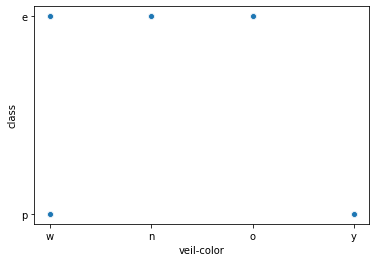

In [104]:
sns.scatterplot(x="veil-color",y="class",data=df)

brown(b),orange(o) veil-color are all edible mushrooms.

yellow(y) veil-color is poisonous mushroom.

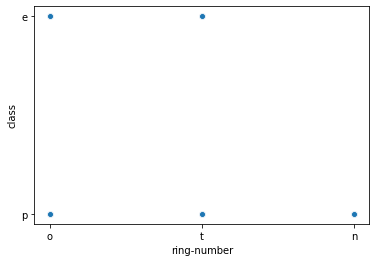

In [105]:
sns.scatterplot(x="ring-number",y="class",data=df)

mushroom having no ring-number are poisonous.

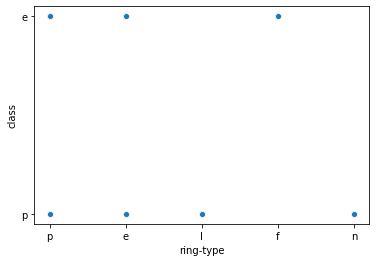

In [106]:
sns.scatterplot(x="ring-type",y="class",data=df)

large(l) ring-type & having no ring are poisonous mushrooms.

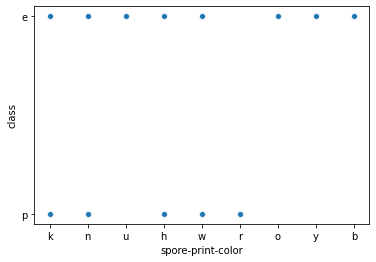

In [107]:
sns.scatterplot(x="spore-print-color",y="class",data=df)

mushroom having green(r) spore are all poisonous.

Mushroom having purple(u), orange(o), yellow(y), buff(b) spores are all edible.

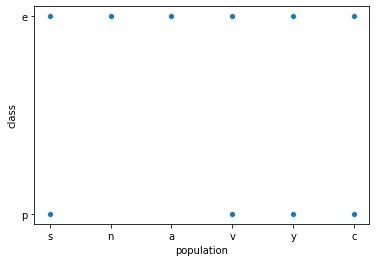

In [108]:
sns.scatterplot(x="population",y="class",data=df)

Mushroom under numerous(n), abundant(a) are all edible.


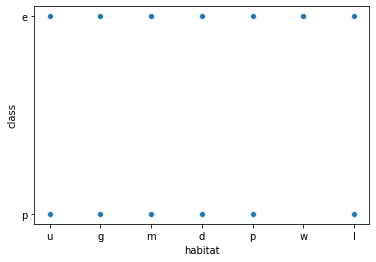

In [109]:
sns.scatterplot(x="habitat",y="class",data=df)

Habitat waste(w) are all edible mushrooms.

# ENCODING

LabelEncoder

AS our dataset is in non-numberic form, we will convert it into numeric through LabelEncoder.

In [110]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [111]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Now all the data is in numeric values.

# FINDING CORRELATION

In [112]:
corr= df.corr()
corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Finding correlation through heatmap

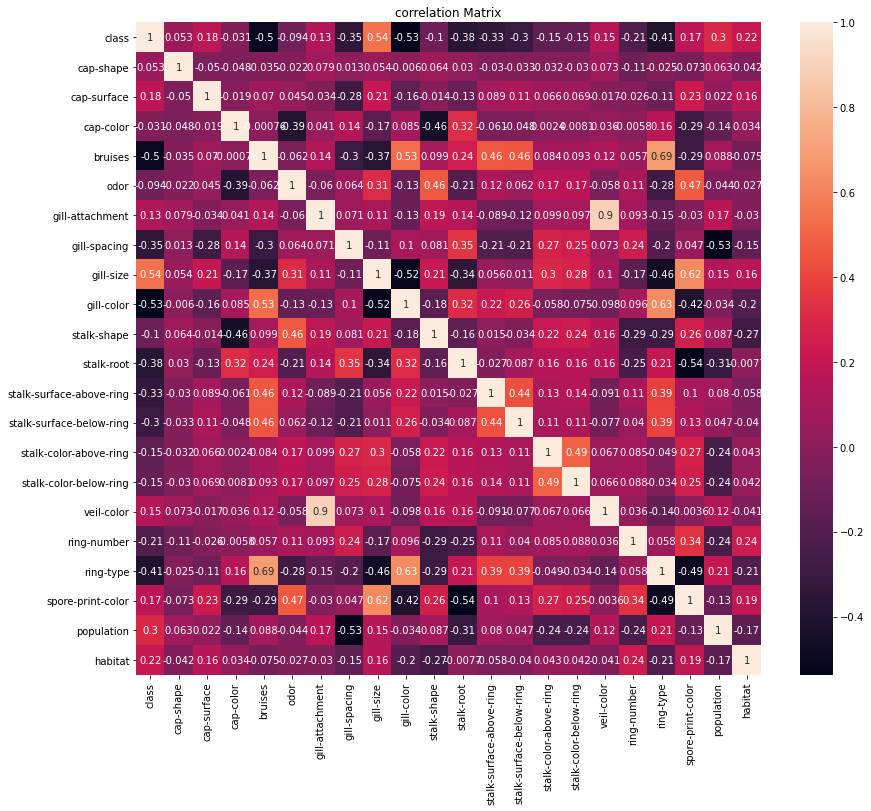

In [113]:
corr_mat=df.corr()   

plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [114]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

We can see that class and gill-size has a good positive correlation.

gill-colour, bruises, ring-type, stalk-root, gill-spacing, ring-number, stalk-surface-below-ring, stalk-surface-above-ring have a good negative relation with class.

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA1D2C3D0>,
      dtype=object)

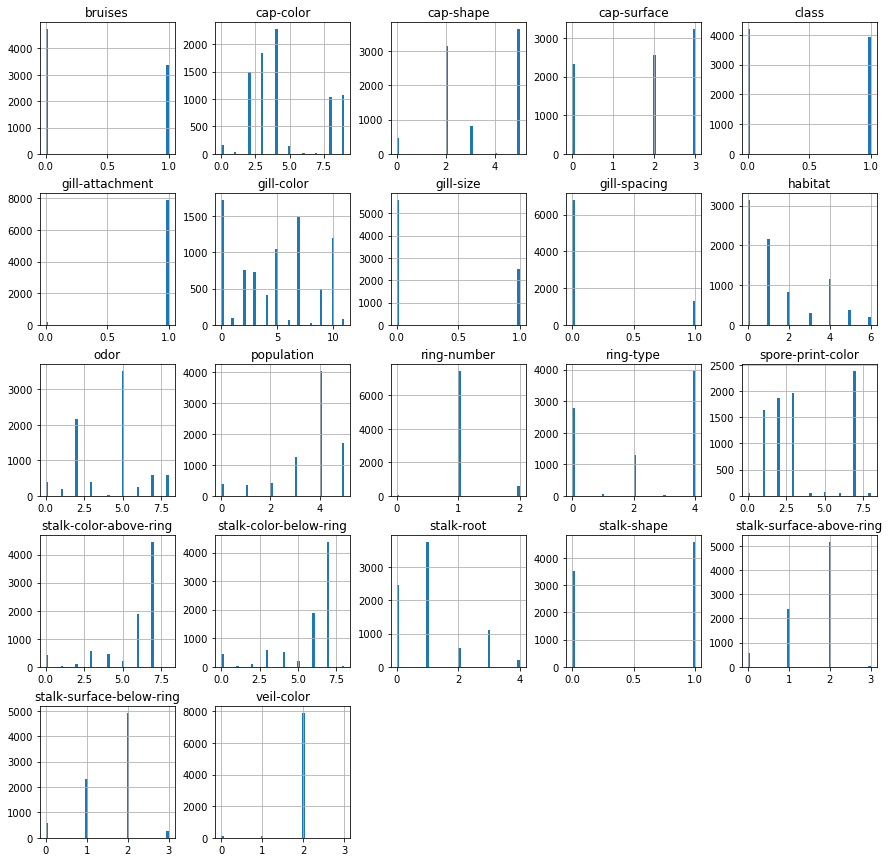

In [115]:
df.hist(bins=50,figsize=(15,15))

# Describing dataset after LabelEncoding

In [116]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

All the data is in integer now.

# Splitting the data into X & Y

In [118]:
x= df.drop("class",axis=1)
y= df["class"]

In [119]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [120]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

These all are independent variables.

In [121]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

This is a dependent varaible on X

# scaling 


In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [123]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.666667,0.625,0.625,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.666667,0.625,0.625,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,0.0,...,0.666667,0.666667,0.625,0.625,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.333333,0.875,0.875,0.666667,0.5,0.0,0.875,0.8,0.333333


Now every column value is between 0 & 1. We can compare the data more accurately.

# Checking Skweness

In [124]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Attributes whose value is greater than +0.5 or -0.5, there is skewness. we need to remove them through power_transform.

# Removing skewness

In [125]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [126]:
df_new.skew()

cap-shape                  -0.142924
cap-surface                -0.370469
cap-color                   0.044334
bruises                     0.342750
odor                       -0.053241
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.052653
stalk-shape                -0.271345
stalk-root                  0.099385
stalk-surface-above-ring   -0.300098
stalk-surface-below-ring   -0.037839
stalk-color-above-ring     -0.765812
stalk-color-below-ring     -0.719707
veil-color                  5.836926
ring-number                -0.827033
ring-type                  -0.256298
spore-print-color           0.146208
population                 -0.210191
habitat                     0.265253
dtype: float64

Now we can see that there is less skewed values.

# FINDING BEST RANDOM STATE

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.9561115668580804 on Random_state 21


# CREATING TRAIN TEST SPLIT

# LogisticRegression

In [128]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(random_state=21)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9532403609515997
[[1202   43]
 [  71 1122]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1245
           1       0.96      0.94      0.95      1193

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



# DecisionTreeClassifier

In [129]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=21)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


1.0
[[1245    0]
 [   0 1193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Support Vector Classifier

In [130]:
from sklearn.svm import SVC

svc= SVC(random_state=21)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9995898277276456
[[1244    1]
 [   0 1193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=21)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


1.0
[[1245    0]
 [   0 1193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           1       1.00      1.00      1.00      1193

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



we are getting higest accuracy with DecisionTreeClassifier, Support Vector Classifier, RandomForestClassifier but it can be due to overfitting also, so we will check cross validation scores.

# cross_val_score

In [131]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model:", scr.mean())

cross validation score of LogisticRegression model: 0.8307270935960591


In [132]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestClassifier model:", scr.mean())

cross validation score of RandomForestClassifier model: 0.891521864342554


In [133]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model:", scr.mean())

cross validation score of SVC model: 0.8577848427434634


In [134]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model:", scr.mean())

cross validation score of DecisionTreeClassifier model: 0.9123346722243275


# The minimum difference between accuracy_score & cross_val_score is with DecisionTreeClassifier algorithm.

# so, this DecisionTreeClassifier our best algorithm.

# Hyperparameter tunning with best model

In [135]:
# importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [136]:
parameters= {'criterion':['gini','entropy'],'max_depth': np.arange(2,15)}

In [137]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [138]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [139]:
accuracy_score(y_test,GCV_pred)

1.0

# AUC ROC CURVE

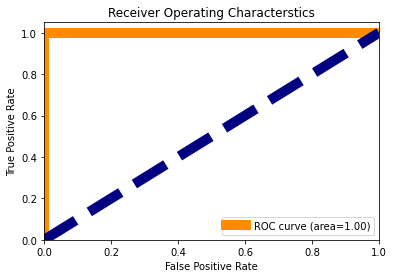

In [140]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(preddtc,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="navy", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

# Model Saving

In [141]:
import joblib
joblib.dump(GCV.best_estimator_,"MushroomDTC.pkl")

['MushroomDTC.pkl']

In [146]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtc.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [145]:
pd.set_option("display.max_rows",None)

# CONCLUSION

# our predicted model is 100% matched with original model